https://github.com/rejuvyesh/PyCallChainRules.jl  
https://github.com/cjdoris/PythonCall.jl/blob/main/examples/flux.ipynb  
https://cjdoris.github.io/PythonCall.jl/stable/juliacall/  
https://github.com/cjdoris/PythonCall.jl

In [2]:
!pip install juliacall

In [1]:
import numpy as np, matplotlib.pyplot as plt
from juliacall import Main as jl, convert as jlconvert


In [2]:
def batch(n):
    x = np.sort(np.random.uniform(-1, 1, (1,n)))
    y = np.sin(x*10) + np.random.normal(0, 0.1, (1,n))
    return x, y

In [3]:
jl.seval("using Flux")
model = jl.Chain(
    jl.Dense(1, 10, jl.relu),
    jl.Dense(10, 10, jl.relu),
    jl.Dense(10, 10, jl.relu),
    jl.Dense(10, 1),
)
loss = jl.seval("m -> (x, y) -> Flux.Losses.mse(m(x), y)")(model)

In [4]:
jl.Flux.train_b(
    loss,
    jl.Flux.params(model),
    jlconvert(jl.Vector[jl.Tuple], [batch(100) for _ in range(2000)]),
    jl.ADAM(0.01),
)

loss = 0.013575861936387284


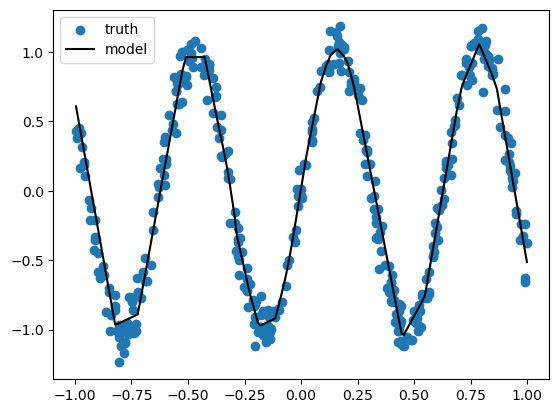

In [5]:
x, y = batch(400)
plt.scatter(x[0], y[0], label="truth")
yhat = model(x)
plt.plot(x[0], yhat[0,:], c="k", label="model")
plt.legend()
print("loss =", loss(x,y))